In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

from treeinterpreter import treeinterpreter as ti

import pydotplus
from IPython.display import Image, display

In [221]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone_df = pd.read_csv('abalone.csv', names=column_names)
abalone_df['sex'] = abalone_df['sex'].map({'F': 0, 'I': 1, 'M': 2})
abalone_df['y'] = abalone_df.rings.map(lambda x: 1 if x > 9 else 0)
abalone_df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,y
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


# Build Model

In [237]:
from sklearn.metrics import roc_auc_score

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt_clf.fit(X_train, y_train)


y_prob = dt_clf.predict_proba(X_test)[:, 1]
dt_clf.score(X_test,y_test)
auc = roc_auc_score(y_test, y_prob)
print(auc)

0.822583692068


## Create feature contribution

In [252]:
pred, bias, contrib = ti.predict(dt_clf, X_train)

# create contrib df
contrib_df = pd.DataFrame(contrib[:, :, 1], columns=X_train.columns)
contrib_df.describe()

contrib_df['label'] = y_test.reset_index(drop=True)
contrib_df['pred_prob'] = pred[:,1]

# Plot feature contribution

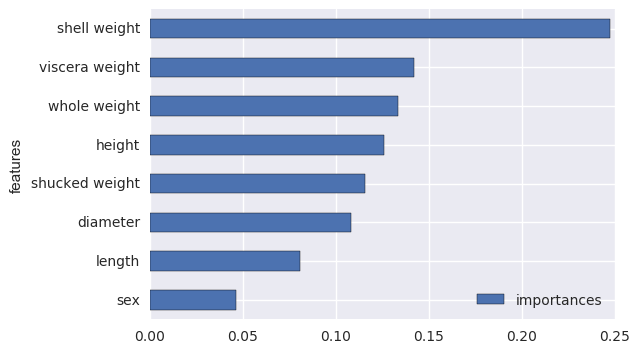

In [240]:
df_importances = pd.DataFrame({'features': X_train.columns,
                               'importances': importances})
df_importances.set_index('features').sort_values('importances').plot(kind='barh')

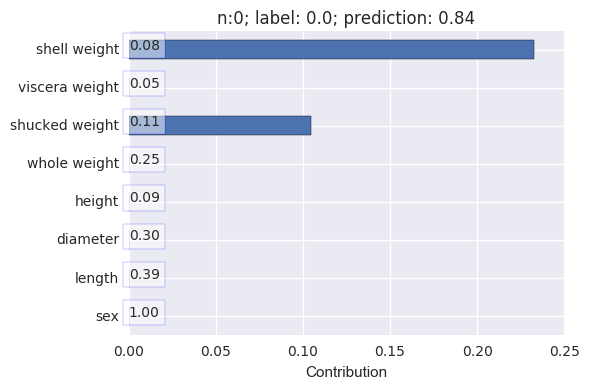

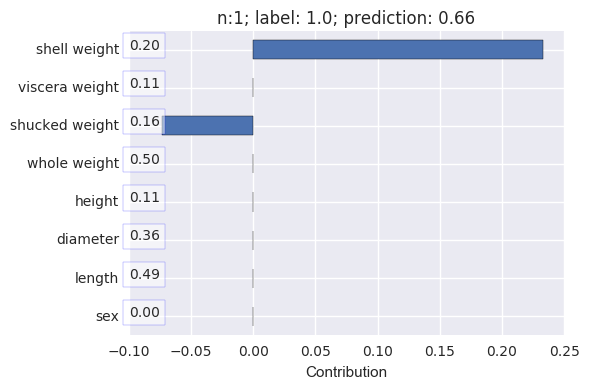

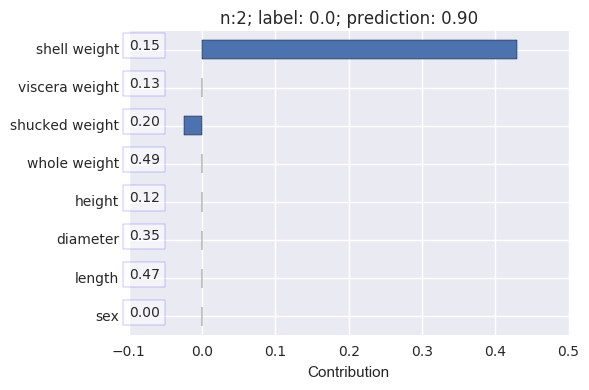

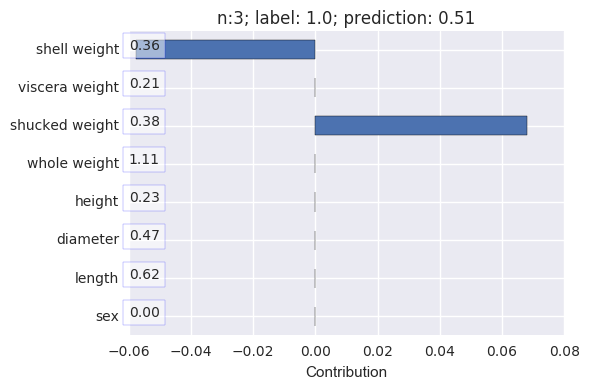

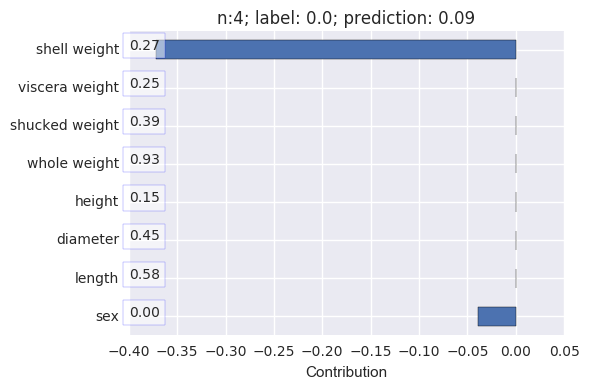

In [253]:
n_plots = 5
col_to_drop = ['label','pred_prob']
for n in range(n_plots):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    row = contrib_df.iloc[n]
    row.drop(col_to_drop).plot(kind='barh')
    
    plt.title('n:{}; label: {}; prediction: {:1.2f}'.format(n,row['label'],row['pred_prob']))
    plt.xlabel('Contribution')
    
    feature_values = X_test.iloc[n]
    x_coord = ax.get_xlim()[0]
    for y_coord,(f,v) in enumerate(feature_values.iteritems()):
        t = plt.text(x_coord,y_coord,'{:2.2f}'.format(v))
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='blue'))
    plt.tight_layout()

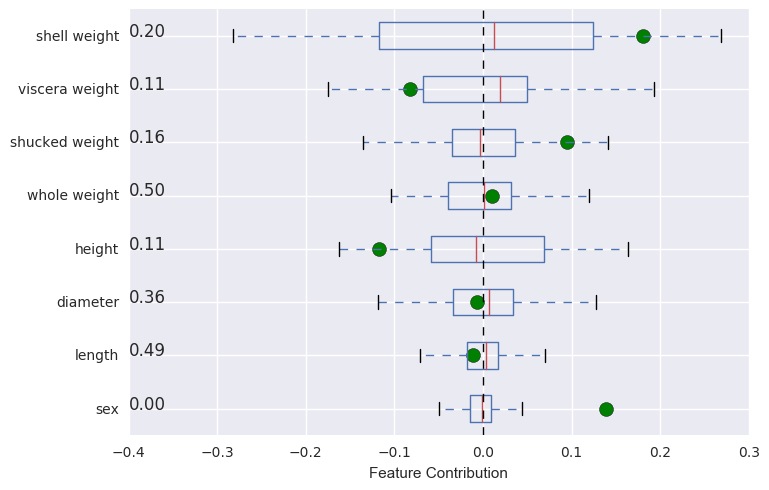

In [219]:
# WIP
ax=contrib_df.drop(['label','pred_prob'],axis=1).plot(kind='box',vert=False)
plt.axvline(0,linestyle='--', color='black', lw=1)
ax.set_xlabel('Feature Contribution')
# row.drop(['label','pred_prob']).plot(kind='barh',ax=ax)
for y_coord,(f,v) in enumerate(row.drop(['label','pred_prob']).iteritems()):
    plt.scatter(v,y_coord+1,s=100,c='green')

for y_coord,(f,v) in enumerate(X_test.iloc[n].iteritems()):
    plt.text(-0.4,y_coord+1,'{:2.2f}'.format(v))
#     plt.v(v,y_coord,'{:2.2f}'.format(v))

# Visualize Tree

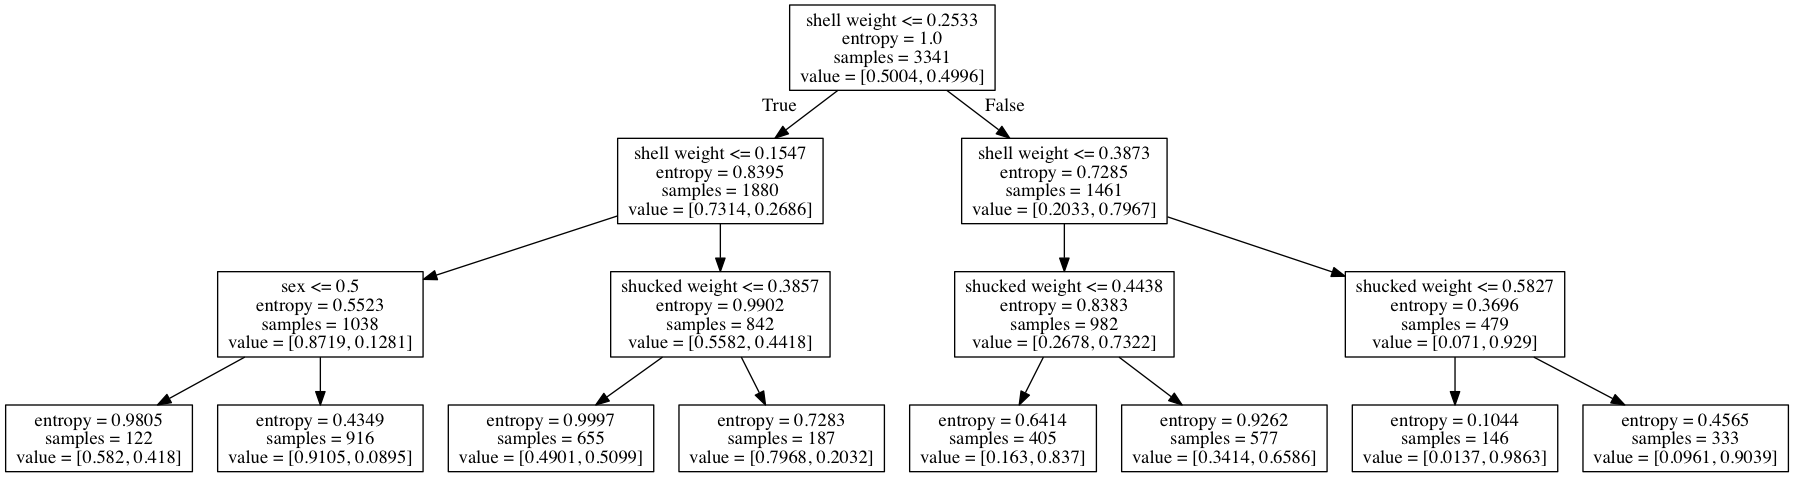

In [227]:
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [235]:
print contrib_df.query('label == 1').mean()
print contrib_df.query('label == 0').mean()

sex              -0.001347
length            0.000000
diameter          0.000000
height            0.000000
whole weight      0.000000
shucked weight    0.003707
viscera weight    0.000000
shell weight     -0.019060
label             1.000000
pred_prob         0.482850
dtype: float64
sex              -0.003089
length            0.000000
diameter          0.000000
height            0.000000
whole weight      0.000000
shucked weight    0.000694
viscera weight    0.000000
shell weight      0.008549
label             0.000000
pred_prob         0.505704
dtype: float64


In [230]:
n = 5
example = X_train.iloc[n:n+1, :]
display(example)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
3825,2,0.625,0.47,0.17,1.1665,0.4605,0.2565,0.3945


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
count,3.341000e+03,3341.0,3341.0,3341.0,3341.0,3.341000e+03,3341.0,3.341000e+03
mean,6.064523e-18,0.0,0.0,0.0,0.0,-1.212905e-17,0.0,7.925417e-17
std,5.898050e-02,0.0,0.0,0.0,0.0,8.107189e-02,0.0,2.933864e-01
min,-3.861137e-02,0.0,0.0,0.0,0.0,-2.385967e-01,0.0,-3.714200e-01
25%,-3.861137e-02,0.0,0.0,0.0,0.0,-2.511489e-02,0.0,-3.714200e-01
50%,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,-5.774581e-02
75%,0.000000e+00,0.0,0.0,0.0,0.0,6.811844e-02,0.0,2.326282e-01
max,2.899018e-01,0.0,0.0,0.0,0.0,1.048578e-01,0.0,4.294678e-01
